# NLP Application with ML-Text Classification

### Importing Libraries

In [157]:
#!pip install nltk
#!pip install spacy -q
#!python -m spacy download en_core_web_sm -q
#!pip install matplotlib==3.4

In [293]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [294]:
import re
import string
#nlp =spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import *
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Loading Dataset and EDA

In [295]:
df = pd.read_excel("Core Test Data.xlsx")
df.head()

,DocumentId,EventInstanceId,#,News Date,Source,Country,Location (LatLng),Locations,Headline,Abstract,First Part,Body,URL,Event Category,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category,Start Date,End Date,Actor List,Location Info,Level of Event,Type,Topic,Aim,Unnamed: 25,Unnamed: 26
0,AgreementsDocId1,AgreementsEventInstanceId1,1.0,2020-11-30 00:00:00,The Libya Observer,libya,NaN,"['Italy', 'Libya', 'Tripoli']",Al-Sarraj reviews with Eni officials support f...,The Head of the Libyan Presidential Council Fa...,The meeting was held in the presence of Eni CE...,NaN,https://www.libyaobserver.ly/inbrief/al-sarraj...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-30 00:00:00,NaN,"Al-Sarraj, Eni officials","Tripoli, Libya",Inter Governmental,Meeting,possible investments of the Italian company in...,NaN,NaN,NaN
1,AgreementsDocId2,AgreementsEventInstanceId2,2.0,2020-12-01 00:00:00,The Libya Observer,libya,"(32.806069013310236, 13.201975860087888)","['Italy', 'Libya']","NOC, Eni review resuming stalled projects",Chairman of the National Oil Corporation (NOC)...,The two parties also discussed the progress ma...,NaN,https://www.libyaobserver.ly/economy/noc-eni-r...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-12-01 00:00:00,NaN,"National Oil Corporation (NOC), Eni company","Tripoli, Libya",Inter Governmental,Meeting,the resumption of some significant projects th...,NaN,NaN,NaN
2,AgreementsDocId3,AgreementsEventInstanceId3,3.0,2020-11-19 00:00:00,Libya Herald,libya,NaN,"['Libya', 'Tripoli', 'Sirte']",Halliburton discusses increased cooperation wi...,"Halliburton Regional Director, Colby Fuser, me...",High accuracy leak detection systems in reserv...,"For his part, Colby Fuser said that he was ver...",https://www.libyaherald.com/2020/11/19/hallibu...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-18 00:00:00,NaN,"National Oil Corporation (NOC), Colby Fuser","Tripoli, Libya",Inter Governmental,Meeting,development of joint cooperation between the t...,NaN,NaN,NaN
3,AgreementsDocId4,AgreementsEventInstanceId4,4.0,2020-11-19 00:00:00,Bloomberg Business,libya,NaN,"['Libya', 'Sweden', 'France', 'Brega']",Libya Says Total Mulls More Investment in Nati...,Total discussed helping boost flows to highest...,Daily output has already recovered to 1.25 mil...,"""This explains the rapid return to previous pr...",https://www.bloomberg.com/news/articles/2020-1...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-18 00:00:00,NaN,"National Oil Corporation (NOC), Total, France",Virtual,Inter Governmental,Meeting,efforts to increase Libyan production capacity...,NaN,NaN,NaN
4,AgreementsDocId5,AgreementsEventInstanceId5,5.0,2020-11-18 00:00:00,Libya Herald,libya,NaN,"[""Ra's Lanuf"", 'Tripoli', 'Benghazi', 'Libya']",Zallaf and NOC discuss new South Refinery,A wide ranging face-to-face technical meeting ...,The NOC reported that during the meeting the t...,NaN,https://www.libyaherald.com/2020/11/18/zallaf-...,agreements,governmentPrivateActorAgreements,Energy agreements / meetings / visits,NaN,2020-11-17 00:00:00,NaN,"National Oil Corporation (NOC), Zallaf Libya Oil","Tripoli, Libya",Intra Governmental,Meeting,the technical and financial details of the pro...,NaN,NaN,NaN


In [296]:
df.shape

(489, 27)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DocumentId              463 non-null    object 
 1   EventInstanceId         463 non-null    object 
 2   #                       463 non-null    float64
 3   News Date               461 non-null    object 
 4   Source                  461 non-null    object 
 5   Country                 462 non-null    object 
 6   Location (LatLng)       70 non-null     object 
 7   Locations               436 non-null    object 
 8   Headline                462 non-null    object 
 9   Abstract                458 non-null    object 
 10  First Part              449 non-null    object 
 11  Body                    268 non-null    object 
 12  URL                     440 non-null    object 
 13  Event Category          462 non-null    object 
 14  1st Level Sub Category  462 non-null    ob

In [298]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(487, 27)

In [299]:
df.isnull().sum()

DocumentId                 24
EventInstanceId            24
#                          24
News Date                  26
Source                     26
Country                    25
Location (LatLng)         417
Locations                  51
Headline                   25
Abstract                   29
First Part                 38
Body                      219
URL                        47
Event Category             25
1st Level Sub Category     25
2nd Level Sub Category    238
3rd Level Sub Category    384
Start Date                186
End Date                  370
Actor List                166
Location Info             205
Level of Event            256
Type                      286
Topic                     314
Aim                       349
Unnamed: 25               361
Unnamed: 26               464
dtype: int64

In [300]:
df["DocumentId"].value_counts()

AgreementsDocId1    1
EconomicDocId31     1
EconomicDocId29     1
EconomicDocId28     1
EconomicDocId27     1
                   ..
ConflictDocId126    1
ConflictDocId125    1
ConflictDocId124    1
ConflictDocId123    1
UprisingDocId10     1
Name: DocumentId, Length: 463, dtype: int64

In [301]:
df["EventInstanceId"].value_counts()

AgreementsEventInstanceId1    1
EconomicEventInstanceId31     1
EconomicEventInstanceId29     1
EconomicEventInstanceId28     1
EconomicEventInstanceId27     1
                             ..
ConflictEventInstanceId126    1
ConflictEventInstanceId125    1
ConflictEventInstanceId124    1
ConflictEventInstanceId123    1
UprisingEventInstanceId10     1
Name: EventInstanceId, Length: 463, dtype: int64

In [302]:
df["#"].value_counts()

1.0      9
4.0      9
5.0      9
6.0      9
7.0      9
        ..
103.0    1
104.0    1
106.0    1
107.0    1
134.0    1
Name: #, Length: 134, dtype: int64

In [303]:
df["News Date"].value_counts()

2020-05-19    11
2020-05-18    10
2020-05-21     8
2020-05-26     7
2020-05-06     7
              ..
2019-11-27     1
2020-06-01     1
2020-05-16     1
2020-04-20     1
2020-01-15     1
Name: News Date, Length: 224, dtype: int64

In [304]:
df["Source"].value_counts()

The Libya Observer           115
Reuters                       88
Libya Herald                  88
ANADOLU AJANSI                52
France 24                      8
???                            8
Al-Monitor                     7
Bloomberg Business             7
Libya Business Review          7
Sputnik                        7
The Guardian                   7
Ahram Online                   6
Xinhua                         5
Al Jazeera                     4
Ahval                          3
DW                             3
Arab News                      3
BBC                            2
Ansamed                        2
???? ???????                   2
S&P Global                     2
AA                             2
The Arab Weekly                2
The Wall Street Journal        2
Deutsche Welle                 2
RTT News                       1
France24                       1
Libya Observer                 1
Africa News                    1
Middle East Eye                1
Financial 

In [305]:
df["Country"].value_counts()

libya    423
Libya     39
Name: Country, dtype: int64

In [306]:
df["Location (LatLng)"].value_counts()

(32.0668698032027, 20.327573584277467)      2
(32.46243057481838, 11.768126121704116)     2
(32.75271750246225, 13.241055017996132)     2
(27.04625257472525, 16.87964281237999)      1
(27.375178543039784, 17.567448250000016)    1
                                           ..
(32.471554918179756, 11.764864555542006)    1
(32.02031445454207, 20.134348906962888)     1
(32.879724263416406, 13.263360219030961)    1
(26.264008667335652, 17.48211021903096)     1
(32.09239053760992, 20.112376250712888)     1
Name: Location (LatLng), Length: 67, dtype: int64

In [307]:
df["Location (LatLng)"].head()

0                                         NaN
1    (32.806069013310236, 13.201975860087888)
2                                         NaN
3                                         NaN
4                                         NaN
Name: Location (LatLng), dtype: object

In [308]:
df["Locations"].value_counts()

['Libya']                                                                               43
['Tripoli', 'Libya']                                                                    24
['Libya', 'Tripoli']                                                                    15
Tripoli                                                                                  9
[]                                                                                       5
                                                                                        ..
['Tarhuna', 'Tripoli', 'Libya', 'Russia', 'France', 'Egypt', 'United Arab Emirates']     1
['Sudan', 'Tripoli', 'Libya']                                                            1
['United Arab Emirates', 'Tripoli', 'Libya', 'Tarhuna']                                  1
['Sirte', 'Tarhuna', 'United Arab Emirates', 'Tripoli', 'Libya']                         1
['Marj', 'Benghazi']                                                                     1

In [309]:
df["Start Date"].value_counts()

Start Date             25
2020-01-01 00:00:00     6
2020-12-16 00:00:00     6
2020-11-19 00:00:00     5
2020-11-16 00:00:00     5
                       ..
2020-04-25 00:00:00     1
2020-02-03 00:00:00     1
2020-01-13 00:00:00     1
2020-06-04 00:00:00     1
2020-09-14 00:00:00     1
Name: Start Date, Length: 173, dtype: int64

In [310]:
df["Actor List"].value_counts()

ISIS                                                                                 17
Actor List                                                                            9
Perpetrator                                                                           8
GNA                                                                                   6
Libya                                                                                 6
                                                                                     ..
GNA, Main economic stakeholders in Libya                                              1
UN, Libya Rivals                                                                      1
UNSMIL, USA, EU, Egypt, GNA                                                           1
The Deputy Chairman of the Presidential Council (PC), Spanish Ambassador to Libya     1
Eastern Libya demonstrators                                                           1
Name: Actor List, Length: 242, d

In [311]:
df["Type"].value_counts()

Energy                                                                                                                                                                                  30
Meeting                                                                                                                                                                                 21
Economy                                                                                                                                                                                 16
10                                                                                                                                                                                       6
Wounded                                                                                                                                                                                  5
                                                                 

In [312]:
df["Aim"].value_counts()

bomb            8
car bomb        6
Weapon Type     4
Not happened    3
Gun             3
               ..
1153            1
1196            1
Total Death     1
47              1
2               1
Name: Aim, Length: 112, dtype: int64

In [313]:
df["Unnamed: 26"].value_counts()

Location Info                                4
Tripoli                                      3
Tripoli                                      2
Malta International Airport                  2
Sirte                                        1
Sabha - Tindi Camp                           1
Southern part of Tripoli                     1
El Feel                                      1
Tripoli, Al-Hadhba                           1
Tarhuna                                      1
Al-Watyah, Al Watiya Airbase                 1
east of Misrata                              1
Tarhuna, about 65km southeast of Tripoli     1
southern Tripoli                             1
Diverted Destination                         1
Benghazi                                     1
Name: Unnamed: 26, dtype: int64

In [314]:
df["Event Category"].value_counts()

conflicts                 133
diplomatic                 77
economicEvents             54
naturalDisasters           49
terror                     39
societalChallenges         36
politicalEvents            33
agreements                 25
uprising                   10
technologicalDisasters      6
Name: Event Category, dtype: int64

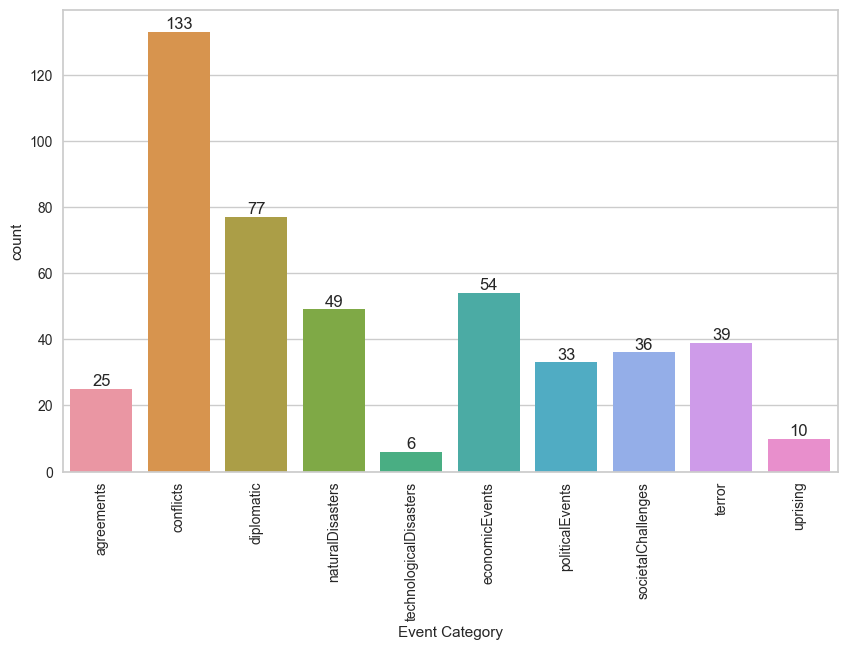

In [315]:
ax = sns.countplot(data = df, x ="Event Category")
for p in ax.containers:
    ax.bar_label(p)
    ax.tick_params(axis="x", rotation=90)

In [316]:
df["1st Level Sub Category"].value_counts()

armedConflicts                      85
diplomaticAgreements                60
nonViolentConflicts                 48
biological                          43
governmentPrivateActorAgreements    18
bombingExplosion                    18
election                            13
businessGrowth                      12
armedAssault                        11
diplomaticCooperation               10
povertyAndHomelessness              10
businessInterruption                 9
monetaryPolicy                       8
governmentChange                     8
immigrationStresses                  7
investment                           7
badGovernance                        7
privateAgreements                    7
technological                        6
goodGovernance                       5
healthcare                           5
debt                                 4
cleanAndSecureEnergy                 4
mobility                             4
turnover/revenue                     4
hostageTaking            

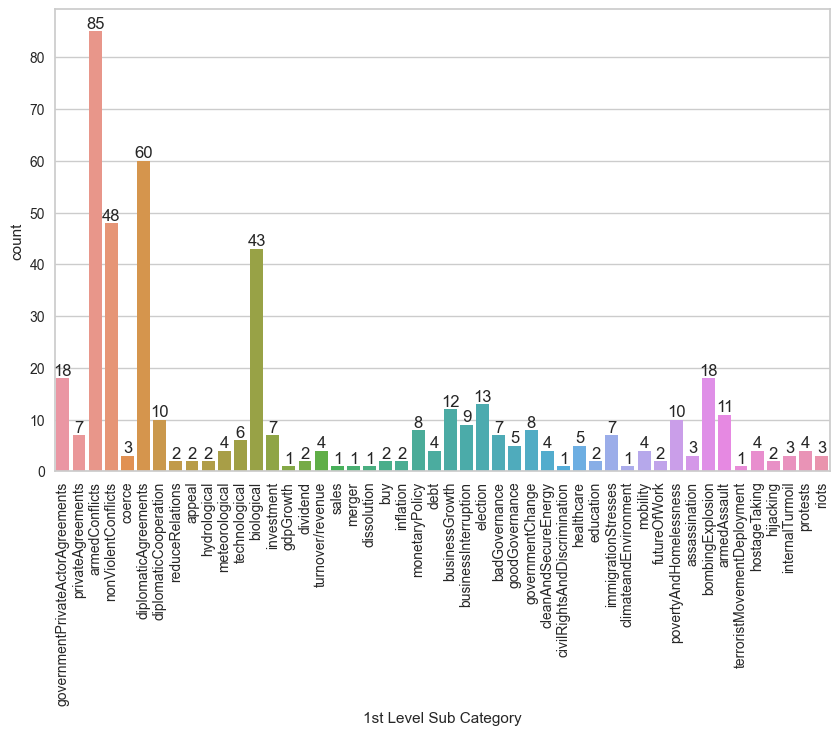

In [317]:
ax = sns.countplot(data = df, x ="1st Level Sub Category")
for p in ax.containers:
    ax.bar_label(p)
    ax.tick_params(axis="x", rotation=90)

In [318]:
df["2nd Level Sub Category"].value_counts()

epidemic                                    43
explosionsRemoteViolence                    42
battles                                     37
militaryPreparations                        30
Energy agreements / meetings / visits       14
economicConflict                            12
Military agreements / meetings / visits     11
Other agreements / meetings / visits        11
Economic agreements / meetings / visits      9
Political agreements / meetings / visits     6
retention                                    6
violenceAgainstCivilians                     6
transportAccident                            5
storm                                        4
Ethnic / tribal conflict                     3
Violent demonstration                        3
flood                                        2
Peaceful protest                             2
Protest with intervention                    2
industrialAccident                           1
Name: 2nd Level Sub Category, dtype: int64

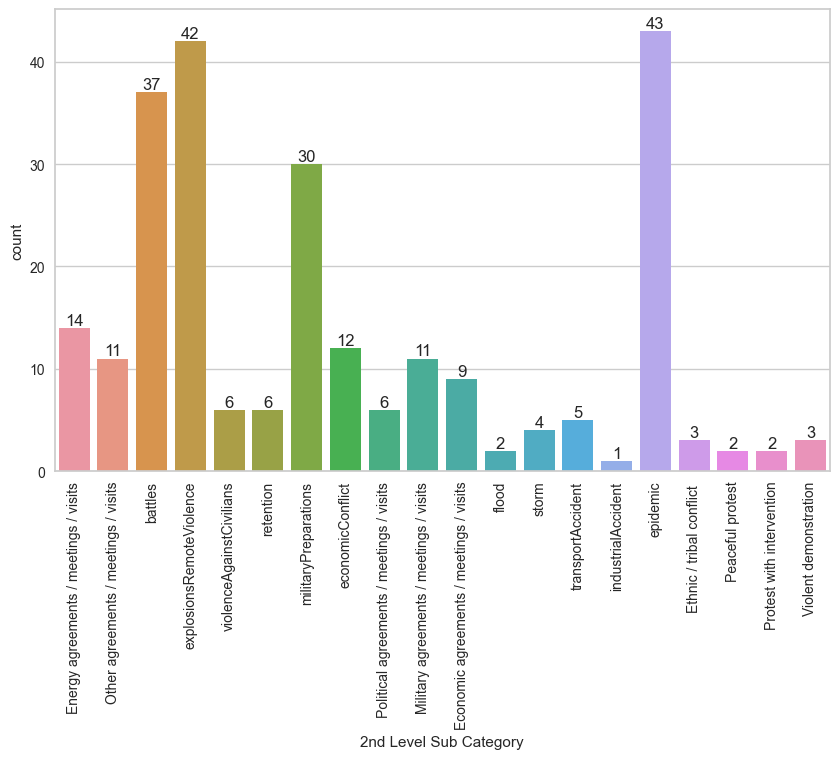

In [319]:
ax = sns.countplot(data = df, x ="2nd Level Sub Category")
for p in ax.containers:
    ax.bar_label(p)
    ax.tick_params(axis="x", rotation=90)

In [320]:
df["3rd Level Sub Category"].value_counts()

viralDiseases                         43
Sanctions / Sanction Threats           7
Force deployment and redisposition     5
water                                  4
convectiveStorm                        4
Territory overtake/regain              3
Economic governance conflict           3
Arms transfer                          3
armed clash                            3
Attack to Civilians                    3
Missile/Rocket/Artillery attack        3
Air/drone attack / air defence         3
Release                                3
Arrest                                 2
Release of abductee                    2
Military training                      2
Remote explosive/landmine              2
riverineFlood                          2
Air defence                            2
Arrest                                 1
Abduction/forced disappearance         1
road                                   1
poisoning                              1
Name: 3rd Level Sub Category, dtype: int64

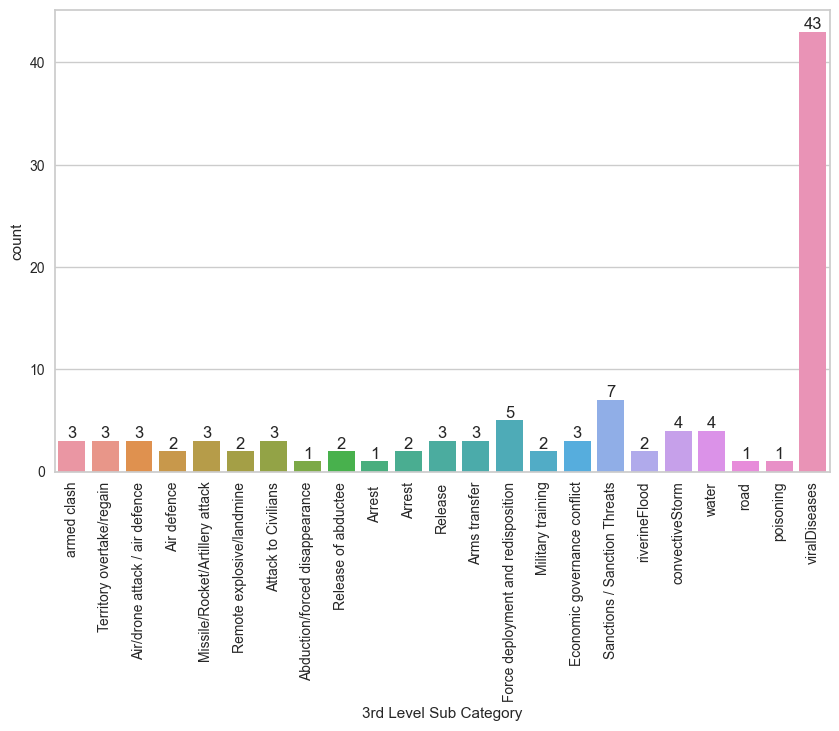

In [321]:
ax = sns.countplot(data = df, x ="3rd Level Sub Category")
for p in ax.containers:
    ax.bar_label(p)
    ax.tick_params(axis="x", rotation=90)

# Feature Selection, Features and Labels for Text Classification Models

### PoliticalEvent Domain for Text Classification

In [322]:
df2 = df[df["Event Category"] == "politicalEvents"][["Headline","Abstract","First Part","Body","Event Category","1st Level Sub Category","2nd Level Sub Category","3rd Level Sub Category"]]

In [323]:
df2.fillna('', inplace=True)

In [324]:
df2["Input"]=df2["Headline"].map(str) +" "+ df2["Abstract"].map(str) +" "+ df2["First Part"].map(str) +" " + df2["Body"].map(str)

In [325]:
df2["Input"].iloc[0]

"Former TV repairman Naker announces his candidacy for Libya's prime The Leader of the 'Summit Party', Abdullah Naker, announced his intention to run for the position of prime minister of the next Libyan government. Naker, a TV repairman-turned-millionaire after 2011, called on the Libyan people to recognize the competence and his ability to lead this sensitive period in Libya's history. Regarding methods of communication with his Summit Party, he attached, what he described as an available telephone number, along with a valid email address for convenience. "

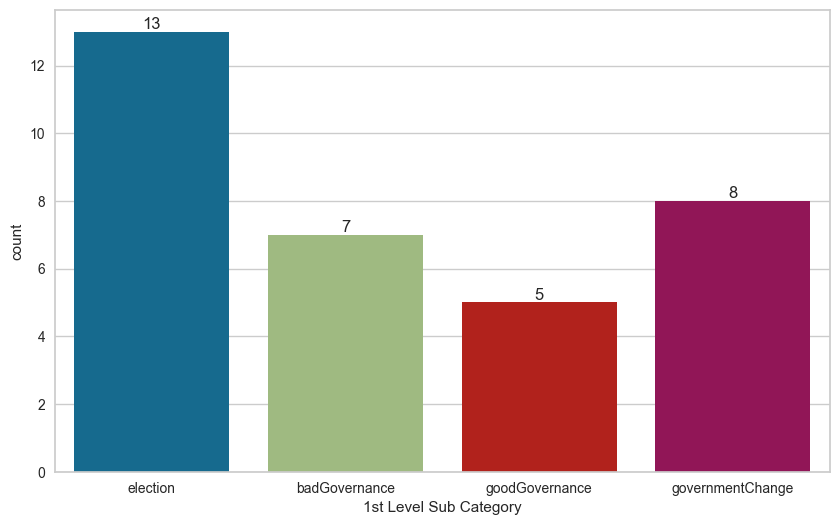

In [326]:
ax = sns.countplot(data = df2, x ="1st Level Sub Category")
for p in ax.containers:
    ax.bar_label(p)

## Cleaning Data

In [327]:
df2["Input"].head()

360    Former TV repairman Naker announces his candid...
361    Libya to hold national elections in December 2...
362    Libya to hold elections in December 2021 The A...
363    Libyans to hold national elections in December...
364    Libya to hold elections on 24 December 2021 Pa...
Name: Input, dtype: object

In [328]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [329]:
stop_words = stopwords.words('english')

In [330]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [331]:
cleaning_text = df2["Input"].apply(cleaning)
cleaning_text.head()

360    former tv repairman naker announces candidacy ...
361    libya hold national election december un missi...
362    libya hold election december acting head un mi...
363    libyan hold national election december body gr...
364    libya hold election december participant libya...
Name: Input, dtype: object

In [332]:
df2["Input"]=df2["Input"].apply(cleaning)

In [333]:
df2["Input"].sample(1)

375    libya fragmentation structure process violent ...
Name: Input, dtype: object

In [334]:
worldcloud = WordCloud(background_color="white", max_words =200)

In [335]:
all_words = " ".join(df2.Input)

In [336]:
all_words[:100]

'former tv repairman naker announces candidacy libya prime leader summit party abdullah naker announc'

In [337]:
worldcloud.generate(all_words)

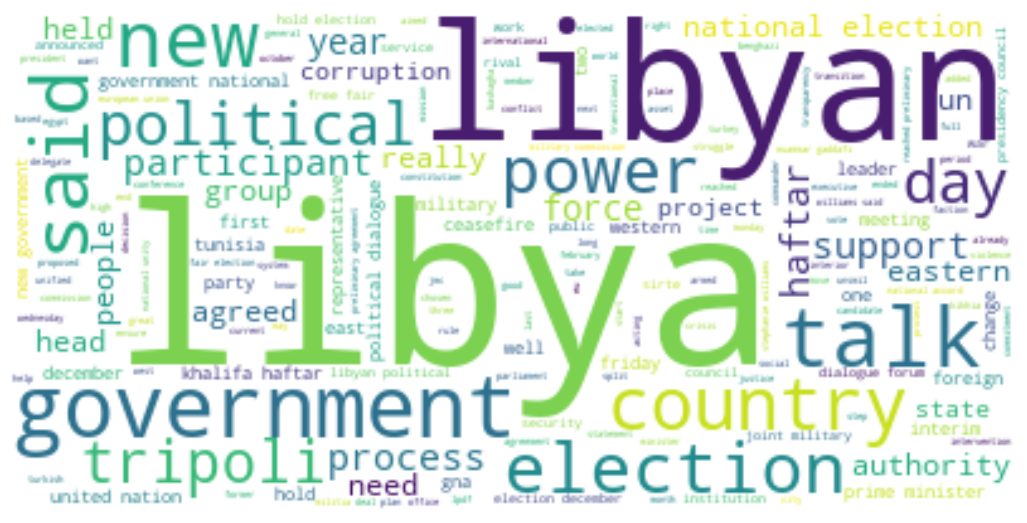

In [338]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Features and Labels

In [339]:
df2 = df2[["Input","1st Level Sub Category", "2nd Level Sub Category","3rd Level Sub Category"]]
df2.sample(3)

,Input,1st Level Sub Category,2nd Level Sub Category,3rd Level Sub Category
369,libyan government expose haftars financial cor...,badGovernance,,
375,libya fragmentation structure process violent ...,badGovernance,,
372,analysis obama struggle contain libya backlash...,badGovernance,,


## Train Test Split

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
X = df2["Input"]
y= df2["1st Level Sub Category"]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

## Vectorization

In [343]:
from sklearn.feature_extraction.text import CountVectorizer

In [344]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,2), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [345]:
vectorizer.get_feature_names_out()

array(['accord', 'across', 'acting', 'added', 'administration', 'african',
       'agreed', 'agreement', 'aimed', 'already', 'also', 'announced',
       'arab', 'army', 'authority', 'back', 'backed', 'based', 'benghazi',
       'body', 'called', 'candidate', 'capital', 'ceasefire', 'change',
       'chaos', 'city', 'civil', 'commander', 'commission', 'conference',
       'continued', 'controlled', 'corruption', 'council', 'country',
       'crisis', 'date', 'day', 'deal', 'decade', 'december', 'decision',
       'delegate', 'dialogue', 'division', 'east', 'eastern', 'economic',
       'egypt', 'elected', 'election', 'emirate', 'end', 'ended', 'envoy',
       'executive', 'existing', 'face', 'fair', 'fighting', 'first',
       'focus', 'force', 'foreign', 'former', 'free', 'friday', 'gaddafi',
       'general', 'gna', 'government', 'ground', 'group', 'haftar',
       'haftars', 'head', 'held', 'history', 'hold', 'holding',
       'important', 'inclusive', 'institution', 'interim',
     

In [346]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [347]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,accord,across,acting,added,administration,african,agreed,agreement,aimed,already,also,announced,arab,army,authority,back,backed,based,benghazi,body,called,candidate,capital,ceasefire,change,...,talk,told,transition,transitional,tripoli,tunis,tunisia,turkey,two,un,united,unity,violence,vote,war,week,well,western,widely,williams,within,without,world,would,year
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,2,0,0,0,1,0,1,0,1,0,2,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,2,1,...,7,1,0,1,1,0,2,0,2,3,0,0,2,0,1,0,1,1,0,3,1,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,...,2,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0
7,0,0,0,1,1,0,1,0,1,1,3,0,1,0,1,1,2,0,1,0,0,2,0,2,1,...,3,0,0,0,4,0,0,1,0,0,2,0,1,2,1,1,0,1,1,0,1,1,0,0,2
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0
9,1,0,0,0,2,0,0,2,1,1,0,0,1,3,1,0,1,0,2,0,0,0,2,0,0,...,0,0,0,0,3,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,2,1,2


## Model Comparisons - Vectorization

In [348]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [349]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    

In [350]:
#encoded_dict = {'election':0,'badGovernance':1, 'goodGovernance':2, 'governmentChange':3}
#y_train= y_train.map(encoded_dict)

## SMOTE Oversampling

In [351]:
from imblearn.over_sampling import SMOTE
X_train_count, y_train = SMOTE(random_state=1,k_neighbors=2).fit_resample(X_train_count, y_train)
print(y_train)

0             election
1     governmentChange
2        badGovernance
3             election
4        badGovernance
5             election
6             election
7     governmentChange
8        badGovernance
9     governmentChange
10            election
11       badGovernance
12            election
13    governmentChange
14       badGovernance
15            election
16    governmentChange
17      goodGovernance
18      goodGovernance
19            election
20      goodGovernance
21            election
22       badGovernance
23       badGovernance
24       badGovernance
25       badGovernance
26      goodGovernance
27      goodGovernance
28      goodGovernance
29      goodGovernance
30      goodGovernance
31      goodGovernance
32    governmentChange
33    governmentChange
34    governmentChange
35    governmentChange
Name: 1st Level Sub Category, dtype: object


In [352]:
y_train.value_counts()

election            9
governmentChange    9
badGovernance       9
goodGovernance      9
Name: 1st Level Sub Category, dtype: int64

## Naive Bayes

In [353]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [354]:
nb = MultinomialNB(alpha=6) # alpha smoothness parameter overfitting used as Grid search 
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=6)

In [355]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1 0 0 1]
 [0 4 0 0]
 [0 2 0 0]
 [0 0 0 3]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.50      0.67         2
        election       0.67      1.00      0.80         4
  goodGovernance       0.00      0.00      0.00         2
governmentChange       0.75      1.00      0.86         3

        accuracy                           0.73        11
       macro avg       0.60      0.62      0.58        11
    weighted avg       0.63      0.73      0.65        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.89      0.94         9
        election       0.90      1.00      0.95         9
  goodGovernance       1.00      1.00      1.00         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           0.97        36
       macro avg       0.97      0.97      0.97        36
    weighted avg       0.98      0.97      0.97     

In [356]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average="macro", labels=['badGovernance', 'election', 'goodGovernance', 'governmentChange']),
            'recall': make_scorer(recall_score, average="macro", labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange']),
            'f1': make_scorer(f1_score, average="macro", labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'])}

model = MultinomialNB(alpha=3)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.782143
test_precision    0.750000
test_recall       0.750000
test_f1           0.720000
dtype: float64

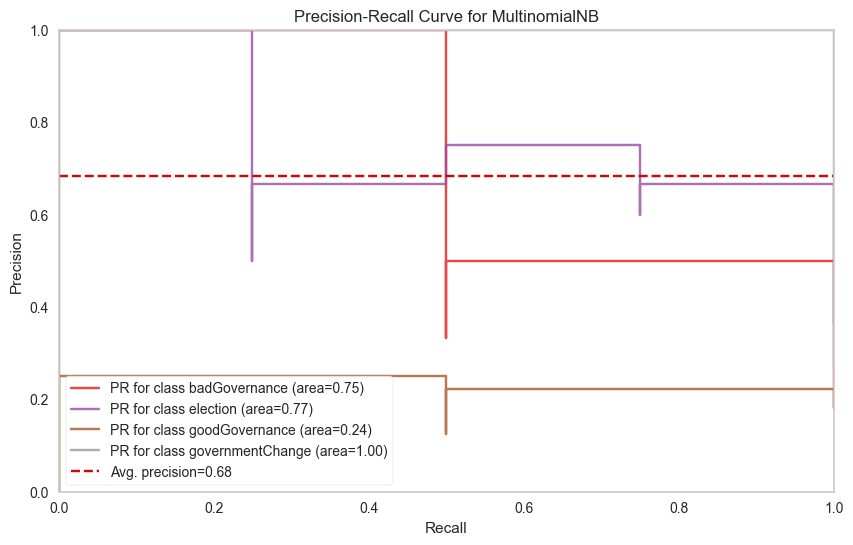

In [357]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=3),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [358]:
nb.classes_

array(['badGovernance', 'election', 'goodGovernance', 'governmentChange'],
      dtype='<U16')

In [359]:
y_pred = nb.predict(X_test_count)
nb_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
nb_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
nb_AP = viz.score_["micro"]

## Logistic Regression

In [360]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.005,solver="saga", max_iter=100, class_weight='balanced') #Cfloat, default=1.0 Inverse of regularization strength;smaller values specify stronger regularization.
log.fit(X_train_count,y_train)

LogisticRegression(C=0.005, class_weight='balanced', solver='saga')

In [361]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[0 0 1 1]
 [0 4 0 0]
 [0 2 0 0]
 [0 0 0 3]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.67      1.00      0.80         4
  goodGovernance       0.00      0.00      0.00         2
governmentChange       0.75      1.00      0.86         3

        accuracy                           0.64        11
       macro avg       0.35      0.50      0.41        11
    weighted avg       0.45      0.64      0.52        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.67      0.80         9
        election       0.82      1.00      0.90         9
  goodGovernance       0.90      1.00      0.95         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           0.92        36
       macro avg       0.93      0.92      0.91        36
    weighted avg       0.93      0.92      0.91    

In [362]:
model = LogisticRegression(C = 0.003, max_iter=100, class_weight="balanced") # min error max iter\ c for overfitting 1 to zero
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.725
test_precision    0.675
test_recall       0.675
test_f1           0.645
dtype: float64

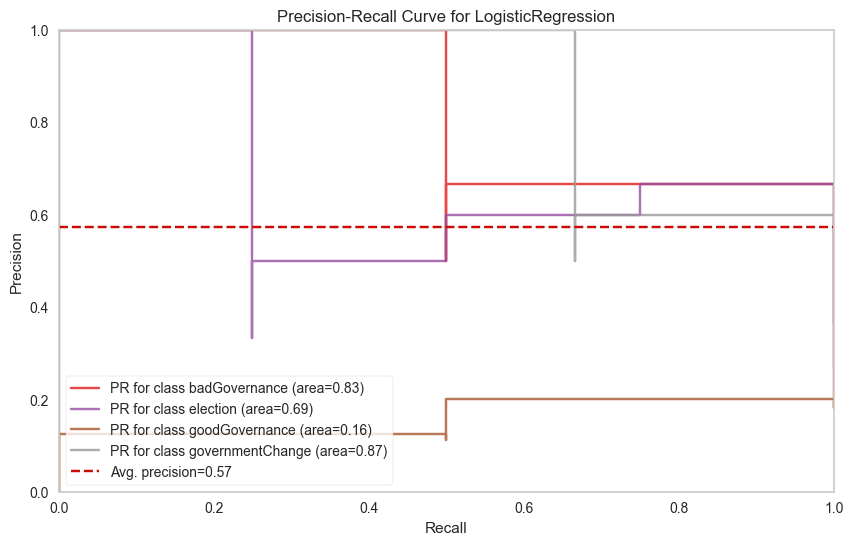

In [363]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.003, max_iter=100),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [364]:
y_pred = log.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
log_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
log_AP = viz.score_["micro"]

## SVM

In [439]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced") # c for overfitting
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced')

In [440]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1 0 0 1]
 [0 4 0 0]
 [0 2 0 0]
 [0 0 0 3]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.50      0.67         2
        election       0.67      1.00      0.80         4
  goodGovernance       0.00      0.00      0.00         2
governmentChange       0.75      1.00      0.86         3

        accuracy                           0.73        11
       macro avg       0.60      0.62      0.58        11
    weighted avg       0.63      0.73      0.65        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.89      0.94         9
        election       1.00      1.00      1.00         9
  goodGovernance       0.90      1.00      0.95         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           0.97        36
       macro avg       0.97      0.97      0.97        36
    weighted avg       0.98      0.97      0.97    

In [441]:
model = LinearSVC(C=0.001, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.725000
test_precision    0.661667
test_recall       0.700000
test_f1           0.641905
dtype: float64

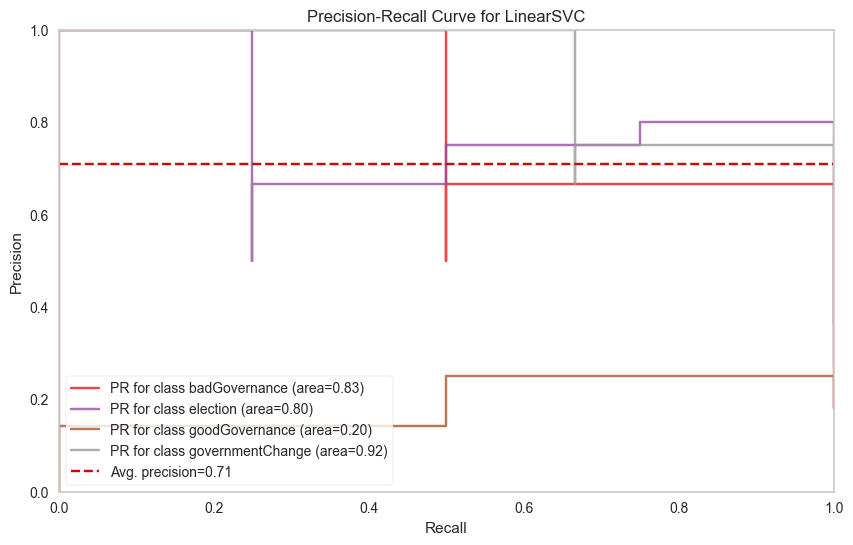

In [442]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced"),
    classes=svc.classes_,
    per_class=True,
    pos_label={'badGovernance', 'election', 'goodGovernance', 'governmentChange'},
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [443]:
y_pred = svc.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
svc_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
svc_AP = viz.score_["micro"]

## KNN

In [444]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [445]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[1 0 1 0]
 [2 1 1 0]
 [2 0 0 0]
 [1 0 2 0]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.17      0.50      0.25         2
        election       1.00      0.25      0.40         4
  goodGovernance       0.00      0.00      0.00         2
governmentChange       0.00      0.00      0.00         3

        accuracy                           0.18        11
       macro avg       0.29      0.19      0.16        11
    weighted avg       0.39      0.18      0.19        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.47      0.89      0.62         9
        election       1.00      0.33      0.50         9
  goodGovernance       0.89      0.89      0.89         9
governmentChange       0.86      0.67      0.75         9

        accuracy                           0.69        36
       macro avg       0.80      0.69      0.69        36
    weighted avg       0.80      0.69      0.69    

In [446]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.553571
test_precision    0.465833
test_recall       0.525000
test_f1           0.456905
dtype: float64

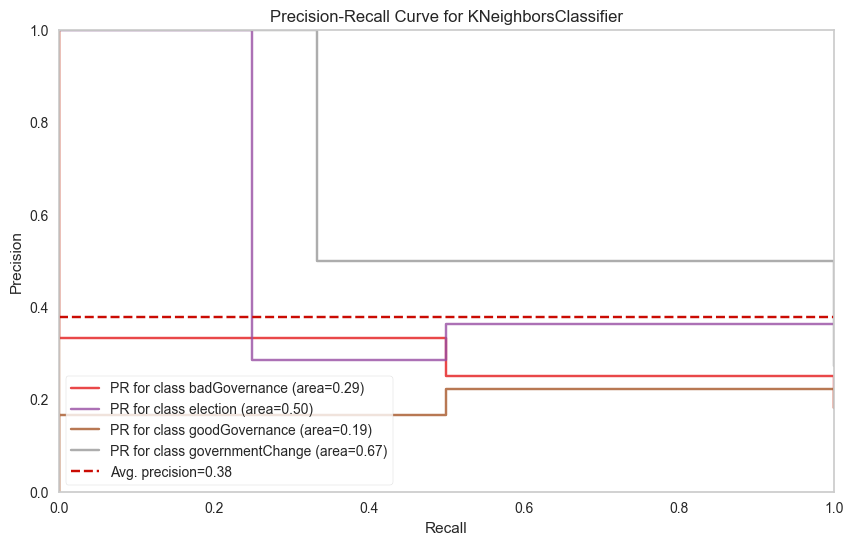

In [447]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=7),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [448]:
y_pred = knn.predict(X_test_count)
knn_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
knn_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
knn_AP = viz.score_["micro"]

## Random Forest

In [449]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(1000, max_depth = 3, random_state = 42, n_jobs = -1, class_weight="balanced") # 
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [450]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[2 0 0 0]
 [3 1 0 0]
 [0 1 1 0]
 [1 0 1 1]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.33      1.00      0.50         2
        election       0.50      0.25      0.33         4
  goodGovernance       0.50      0.50      0.50         2
governmentChange       1.00      0.33      0.50         3

        accuracy                           0.45        11
       macro avg       0.58      0.52      0.46        11
    weighted avg       0.61      0.45      0.44        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.90      1.00      0.95         9
        election       1.00      0.89      0.94         9
  goodGovernance       1.00      1.00      1.00         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           0.97        36
       macro avg       0.97      0.97      0.97        36
    weighted avg       0.98      0.97      0.97     

In [451]:
model = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1,class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.832143
test_precision    0.800000
test_recall       0.800000
test_f1           0.778333
dtype: float64

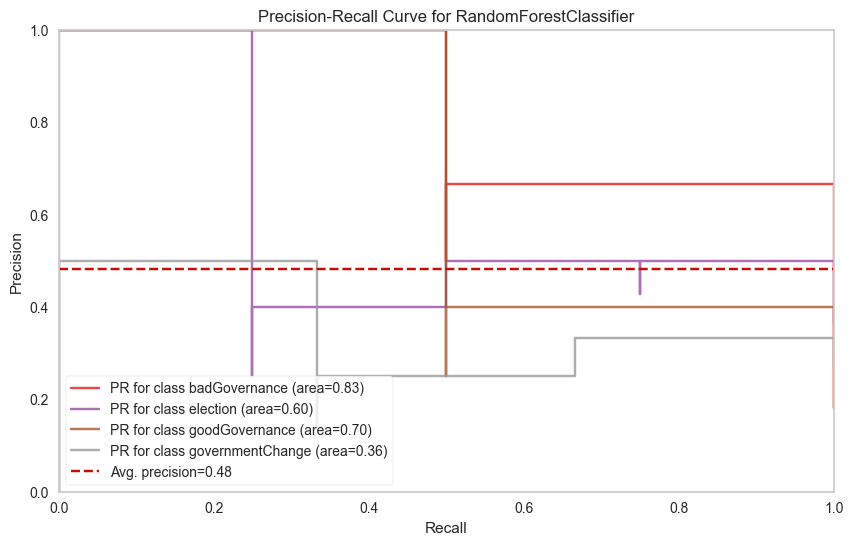

In [452]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1,class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [453]:
y_pred = rf.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
rf_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
rf_AP = viz.score_["micro"]

## Ada Boost

In [454]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 50, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(random_state=42)

In [455]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[0 2 0 0]
 [0 4 0 0]
 [1 1 0 0]
 [1 1 0 1]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.50      1.00      0.67         4
  goodGovernance       0.00      0.00      0.00         2
governmentChange       1.00      0.33      0.50         3

        accuracy                           0.45        11
       macro avg       0.38      0.33      0.29        11
    weighted avg       0.45      0.45      0.38        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      0.78      0.88         9
        election       0.82      1.00      0.90         9
  goodGovernance       1.00      1.00      1.00         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           0.94        36
       macro avg       0.95      0.94      0.94        36
    weighted avg       0.95      0.94      0.94    

In [456]:
model = AdaBoostClassifier(n_estimators= 50)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.582143
test_precision    0.519167
test_recall       0.600000
test_f1           0.510476
dtype: float64

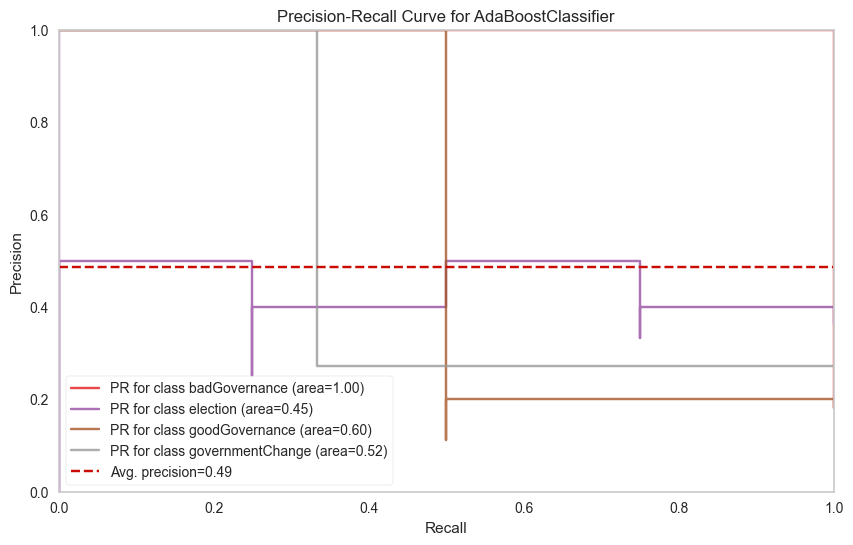

In [457]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 50, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [458]:
y_pred = ada.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
ada_count_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
ada_AP = viz.score_["micro"]

## TF-IDF

In [459]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [460]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [461]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08705551],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09711237],
       [0.09985796, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [462]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,accord,across,acting,added,administration,african,agreed,agreement,aimed,already,also,announced,arab,army,authority,back,backed,based,benghazi,body,called,candidate,capital,ceasefire,change,...,talk,told,transition,transitional,tripoli,tunis,tunisia,turkey,two,un,united,unity,violence,vote,war,week,well,western,widely,williams,within,without,world,would,year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251034,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137738,0.137738,0.000000,0.000000,0.117424,0.126558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137738,...,0.000000,0.000000,0.000000,0.000000,0.157372,0.000000,0.000000,0.000000,0.109700,0.000000,0.087056,0.000000,0.137738,0.000000,0.194219,0.000000,0.000000,0.117424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087056
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195796,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.111853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.063495,0.146504,0.000000,0.073252,0.000000,0.073252,0.056207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073252,0.079723,0.000000,0.079723,0.000000,0.000000,0.146504,0.079723,...,0.372063,0.079723,0.000000,0.073252,0.045544,0.000000,0.146504,0.000000,0.126990,0.219756,0.000000,0.000000,0.159446,0.000000,0.056207,0.000000,0.073252,0.067965,0.000000,0.203895,0.067965,0.000000,0.000000,0.000000,0.050388
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133211,0.000000,0.000000,0.124450,0.000000,0.000000,0.000000,0.399634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.124450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098760
5,0.000000,0.117236,0.000000,0.000000,0.000000,0.000000,0.089957,0.000000,0.000000,0.000000,0.000000,0.101620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127592,0.127592,0.000000,0.000000,0.000000,0.000000,...,0.170133,0.000000,0.000000,0.000000,0.000000,0.127592,0.117236,0.000000,0.000000,0.000000,0.080643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127592,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.135393,0.000000,0.000000,0.000000,0.000000,0.251241,0.000000,0.000000,0.117358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.196482,0.000000,0.000000,0.000000,0.000000,0.147353,0.000000,0.000000,0.000000,0.000000,0.186265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125621,0.125621,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.054986,0.054986,0.000000,0.042191,0.000000,0.059843,0.054986,0.142985,0.000000,0.059843,0.000000,0.051017,0.059843,0.102034,0.000000,0.059843,0.000000,0.000000,0.119686,0.000000,0.109971,0.059843,...,0.119693,0.000000,0.000000,0.000000,0.136747,0.000000,0.000000,0.059843,0.000000,0.000000,0.075646,0.000000,0.059843,0.119686,0.042191,0.054986,0.000000,0.051017,0.059843,0.000000,0.051017,0.059843,0.000000,0.000000

In [463]:
X = df2["Input"]
y= df2["1st Level Sub Category"]

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [465]:
from imblearn.over_sampling import SMOTE
X_train_tf_idf, y_train = SMOTE(random_state=1,k_neighbors=2).fit_resample(X_train_tf_idf, y_train)
print(y_train)

0             election
1     governmentChange
2        badGovernance
3             election
4        badGovernance
5             election
6             election
7     governmentChange
8        badGovernance
9     governmentChange
10            election
11       badGovernance
12            election
13    governmentChange
14       badGovernance
15            election
16    governmentChange
17      goodGovernance
18      goodGovernance
19            election
20      goodGovernance
21            election
22       badGovernance
23       badGovernance
24       badGovernance
25       badGovernance
26      goodGovernance
27      goodGovernance
28      goodGovernance
29      goodGovernance
30      goodGovernance
31      goodGovernance
32    governmentChange
33    governmentChange
34    governmentChange
35    governmentChange
Name: 1st Level Sub Category, dtype: object


## Model Comparisons  TF-IDF

## Naive Bayes

In [466]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB(alpha=3)
nb.fit(X_train_tf_idf,y_train)

MultinomialNB(alpha=3)

In [467]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[0 0 1 1]
 [1 3 0 0]
 [1 1 0 0]
 [0 0 0 3]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.75      0.75      0.75         4
  goodGovernance       0.00      0.00      0.00         2
governmentChange       0.75      1.00      0.86         3

        accuracy                           0.55        11
       macro avg       0.38      0.44      0.40        11
    weighted avg       0.48      0.55      0.51        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      1.00      1.00         9
        election       1.00      1.00      1.00         9
  goodGovernance       1.00      1.00      1.00         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           1.00        36
       macro avg       1.00      1.00      1.00        36
    weighted avg       1.00      1.00      1.00     

In [468]:
model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.492857
test_precision    0.502143
test_recall       0.550000
test_f1           0.452500
dtype: float64

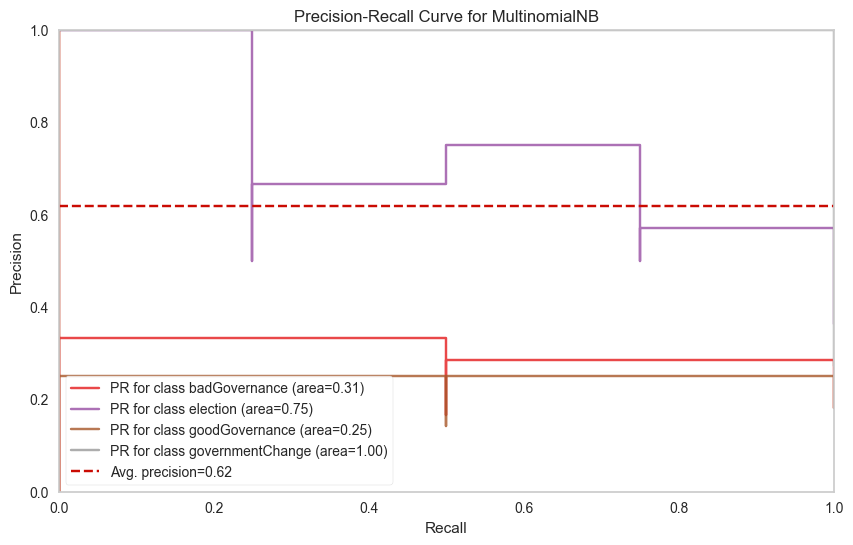

In [469]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=2),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [470]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
nb_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
nb_tfidf_AP = viz.score_["micro"]

## Logistic Regression

In [471]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.005,solver="saga", max_iter=1000, class_weight='balanced')
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.005, class_weight='balanced', max_iter=1000,
                   solver='saga')

In [472]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[0 0 1 1]
 [0 0 4 0]
 [0 0 2 0]
 [0 0 3 0]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.00      0.00      0.00         4
  goodGovernance       0.20      1.00      0.33         2
governmentChange       0.00      0.00      0.00         3

        accuracy                           0.18        11
       macro avg       0.05      0.25      0.08        11
    weighted avg       0.04      0.18      0.06        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         9
        election       0.00      0.00      0.00         9
  goodGovernance       0.33      1.00      0.50         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           0.50        36
       macro avg       0.33      0.50      0.38        36
    weighted avg       0.33      0.50      0.38    

In [473]:
model = LogisticRegression(C=0.005, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.239286
test_precision    0.161905
test_recall       0.325000
test_f1           0.173333
dtype: float64

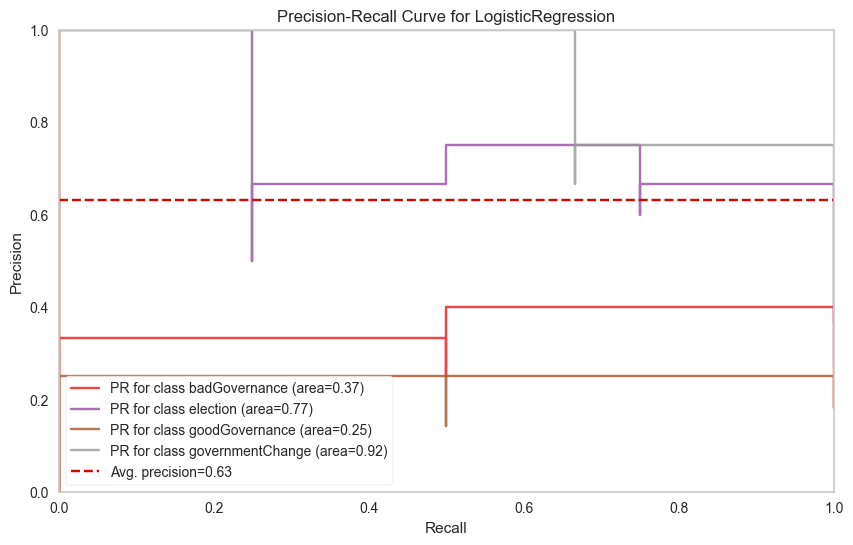

In [474]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.005, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [475]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
log_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
log_tfidf_AP = viz.score_["micro"]

## SVM

In [476]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.05, class_weight="balanced")
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.05, class_weight='balanced')

In [477]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[0 0 1 1]
 [1 3 0 0]
 [1 1 0 0]
 [0 0 0 3]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.75      0.75      0.75         4
  goodGovernance       0.00      0.00      0.00         2
governmentChange       0.75      1.00      0.86         3

        accuracy                           0.55        11
       macro avg       0.38      0.44      0.40        11
    weighted avg       0.48      0.55      0.51        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      1.00      1.00         9
        election       1.00      1.00      1.00         9
  goodGovernance       1.00      1.00      1.00         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           1.00        36
       macro avg       1.00      1.00      1.00        36
    weighted avg       1.00      1.00      1.00    

In [478]:
model = LinearSVC(C=0.05) # Smaller c in imbalance data. The classifier can maximize the margin between most of the points, while misclassifying a few points, because the penalty is so low
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.892857
test_precision    0.933333
test_recall       0.900000
test_f1           0.898333
dtype: float64

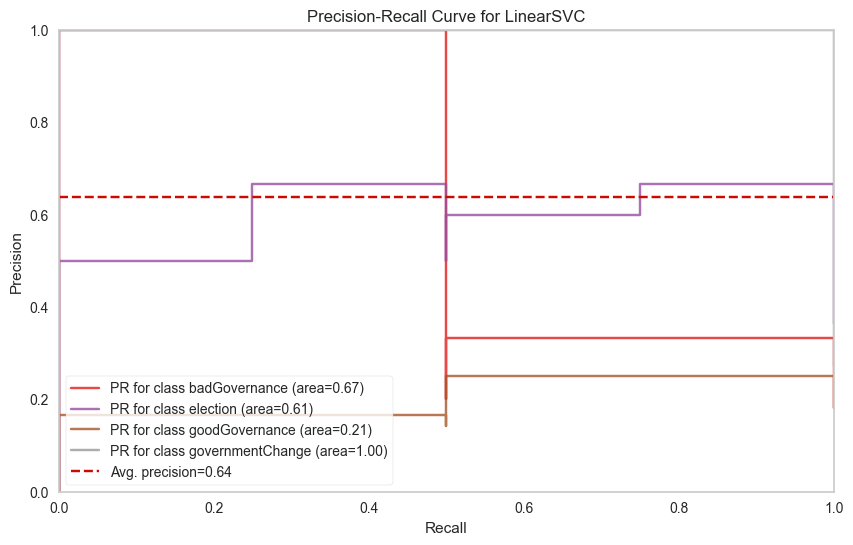

In [479]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [480]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
svc_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
svc_tfidf_AP = viz.score_["micro"]

## KNN

In [481]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=7)

In [482]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

KNN MODEL
[[0 0 1 1]
 [1 1 1 1]
 [0 1 1 0]
 [1 0 0 2]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.00      0.00      0.00         2
        election       0.50      0.25      0.33         4
  goodGovernance       0.33      0.50      0.40         2
governmentChange       0.50      0.67      0.57         3

        accuracy                           0.36        11
       macro avg       0.33      0.35      0.33        11
    weighted avg       0.38      0.36      0.35        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.78      0.78      0.78         9
        election       1.00      0.56      0.71         9
  goodGovernance       0.75      1.00      0.86         9
governmentChange       0.80      0.89      0.84         9

        accuracy                           0.81        36
       macro avg       0.83      0.81      0.80        36
    weighted avg       0.83      0.81      0.80    

In [483]:
model = KNeighborsClassifier(n_neighbors=6)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.725000
test_precision    0.700000
test_recall       0.725000
test_f1           0.676667
dtype: float64

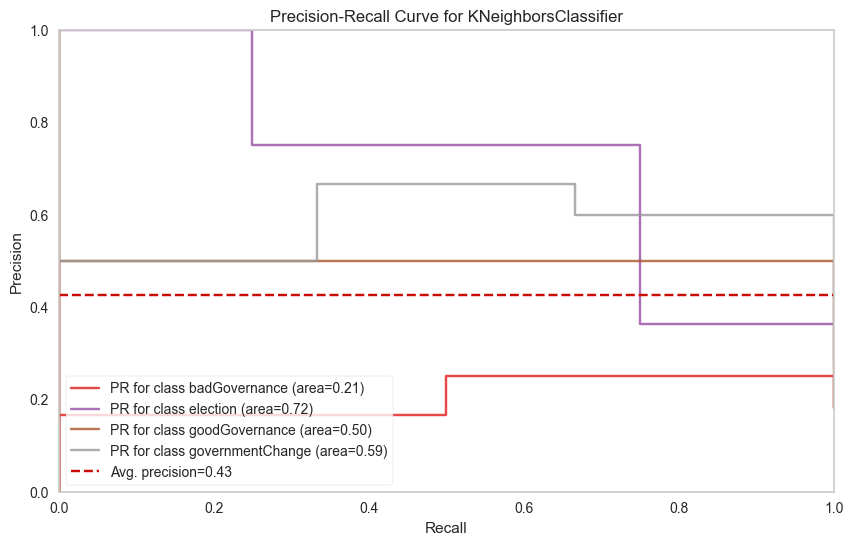

In [484]:
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_neighbors=6),
    classes=knn.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [485]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
knn_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
knn_tfidf_AP = viz.score_["micro"]

## RandomForest

In [486]:
rf = RandomForestClassifier(100, max_depth = 5, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=42)

In [487]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2 0 0 0]
 [0 4 0 0]
 [0 2 0 0]
 [0 2 0 1]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      1.00      1.00         2
        election       0.50      1.00      0.67         4
  goodGovernance       0.00      0.00      0.00         2
governmentChange       1.00      0.33      0.50         3

        accuracy                           0.64        11
       macro avg       0.62      0.58      0.54        11
    weighted avg       0.64      0.64      0.56        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       1.00      1.00      1.00         9
        election       1.00      1.00      1.00         9
  goodGovernance       1.00      1.00      1.00         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           1.00        36
       macro avg       1.00      1.00      1.00        36
    weighted avg       1.00      1.00      1.00     

In [488]:
model = RandomForestClassifier(100, max_depth=5, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.867857
test_precision    0.900000
test_recall       0.875000
test_f1           0.866667
dtype: float64

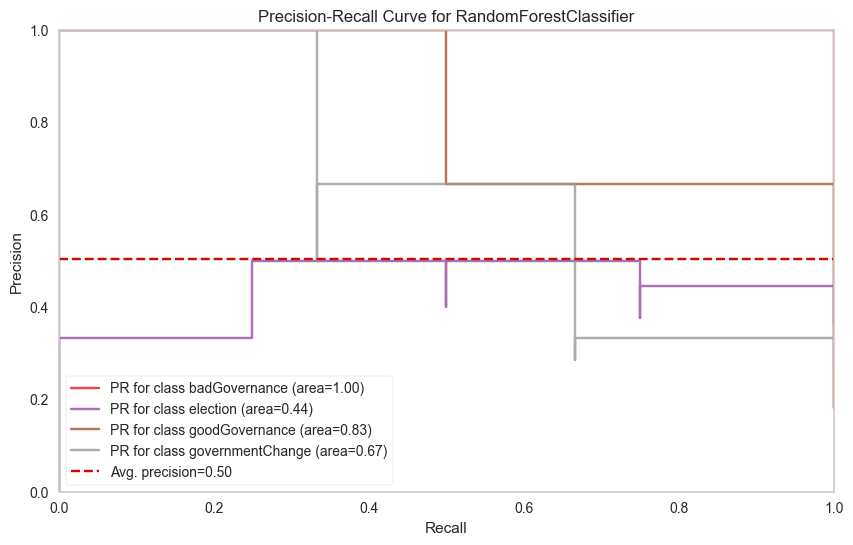

In [489]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=5, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [490]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
rf_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
rf_tfidf_AP = viz.score_["micro"]

## Ada Boost

In [491]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 100, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [492]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[2 0 0 0]
 [4 0 0 0]
 [1 0 1 0]
 [1 0 1 1]]
Test_Set
                  precision    recall  f1-score   support

   badGovernance       0.25      1.00      0.40         2
        election       0.00      0.00      0.00         4
  goodGovernance       0.50      0.50      0.50         2
governmentChange       1.00      0.33      0.50         3

        accuracy                           0.36        11
       macro avg       0.44      0.46      0.35        11
    weighted avg       0.41      0.36      0.30        11

Train_Set
                  precision    recall  f1-score   support

   badGovernance       0.50      1.00      0.67         9
        election       0.00      0.00      0.00         9
  goodGovernance       1.00      1.00      1.00         9
governmentChange       1.00      1.00      1.00         9

        accuracy                           0.75        36
       macro avg       0.62      0.75      0.67        36
    weighted avg       0.62      0.75      0.67    

In [493]:
model = AdaBoostClassifier(n_estimators= 100, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_accuracy     0.557143
test_precision    0.440000
test_recall       0.575000
test_f1           0.465476
dtype: float64

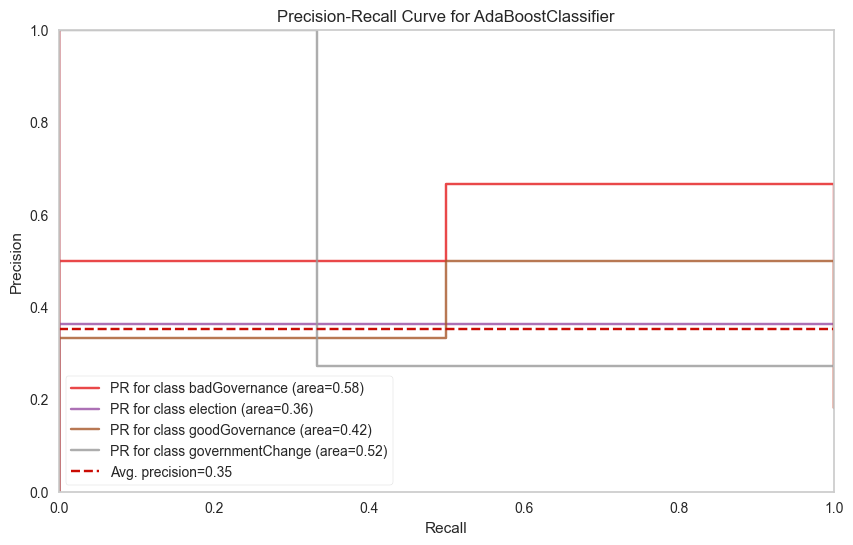

In [494]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 50, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [495]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec = recall_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
ada_tfidf_f1 = f1_score(y_test, y_pred, labels = ['badGovernance', 'election', 'goodGovernance', 'governmentChange'], average = "macro")
ada_tfidf_AP = viz.score_["micro"]

In [496]:
viz.score_["micro"]

0.3518791814246359

## Compare Scoring

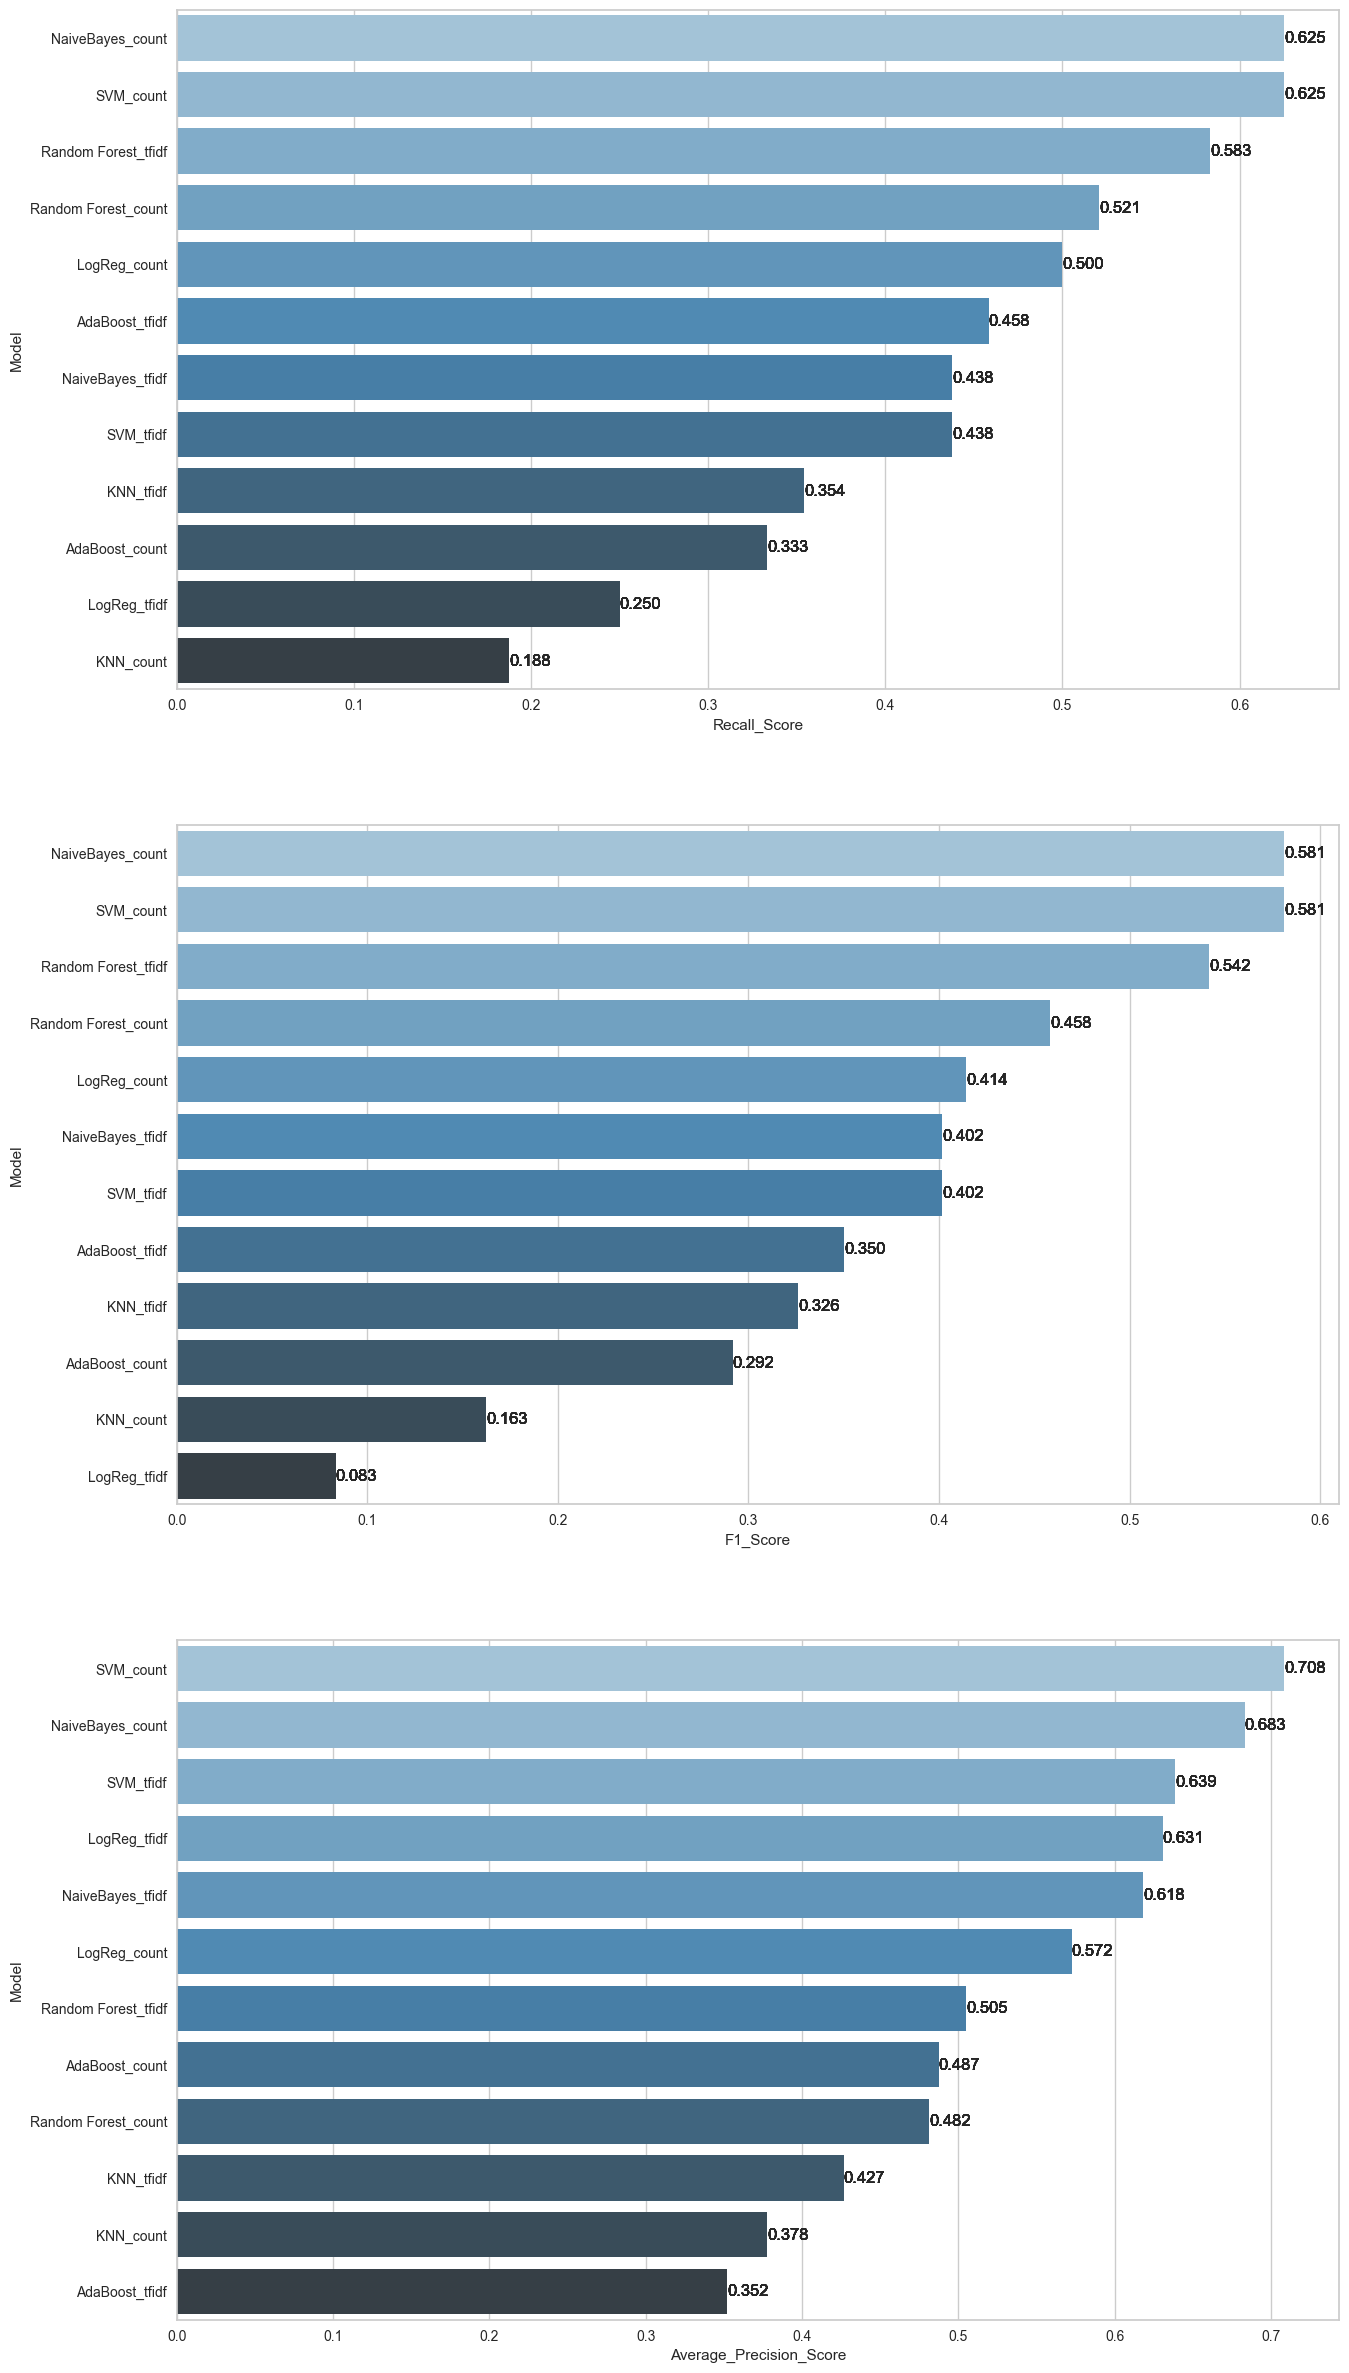

In [497]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, knn_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, knn_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                  knn_count_rec, rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  knn_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec],
                        
                        "Average_Precision_Score": [nb_AP, log_AP, svc_AP, knn_AP, rf_AP,
                                                          ada_AP, nb_tfidf_AP, log_tfidf_AP, svc_tfidf_AP,
                                                           knn_tfidf_AP, rf_tfidf_AP, ada_tfidf_AP]})

def labels(ax):
                        
    for p in ax.patches:
        ax.bar_label(ax.containers[0],fmt="%.3f")
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

## Best Model and Predictions


In [498]:
from sklearn.pipeline import Pipeline

In [499]:
pipe = Pipeline([('cv',CountVectorizer (preprocessor=cleaning, min_df=3)),('svc',LinearSVC (C=0.001, class_weight="balanced"))])

In [500]:
pipe.fit(X, y)

Pipeline(steps=[('cv',
                 CountVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x00000277A1CB41F0>)),
                ('svc', LinearSVC(C=0.001, class_weight='balanced'))])

In [501]:
example = X_test.iloc[1]
example = pd.Series(example)

In [502]:
print("Predicted Sub Category =", pipe.predict(example))
print("Actual Sub Category    =", y_test.iloc[1])

Predicted Sub Category = ['election']
Actual Sub Category    = election


In [503]:
X_test.iloc[1]

'libya army call free fair election libyan national army lna seek free fair election reflect libyan people spokesman army ahmad said sunday speaking reporter press conference cairo noted libyan crisis mainly security rather political issue army leading military campaign since early april attempting take capital tripoli government fighting killed injured thousand people forced civilian flee home rival agreed however party exchanged accusation breaching truce'